In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sys

np.set_printoptions(threshold=sys.maxsize)

import warnings
import platform

if platform.system() == "Darwin":  # MAC인 경우
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

warnings.filterwarnings("ignore")
pd.options.display.float_format = "{:.5f}".format

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [152]:
df = pd.read_csv("../1.데이터셋/Train_Test/unlisted_resampled_train_data.csv")

In [153]:
com = df[['회사명', '거래소코드', '회계년도']]

In [154]:
life_cycle = df[["도입기", "성장기", "성숙기", "쇠퇴기"]]

##### 전체 리스트의 회귀계수 구하기

In [155]:
feature_list = [
    # 현금흐름
    "CASH FLOW 대 부채비율",
    "CASH FLOW 대 총자본비율",
    "CASH FLOW 대 매출액비율",
    # 안정성
    "자기자본구성비율",
    "차입금의존도",
    "순운전자본비율",
    # 수익성
    "총자본사업이익률",
    "총자본영업이익률",
    "금융비용부담률",
]

In [156]:
x_train = df[feature_list]

y_train = df["부실판단"]

In [157]:
coef = df[feature_list]
# coef

In [158]:
coef.describe()

,CASH FLOW 대 부채비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,자기자본구성비율,차입금의존도,순운전자본비율,총자본사업이익률,총자본영업이익률,금융비용부담률
count,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000
mean,1.63967,-0.52250,-24.87343,35.37602,44.65284,-0.27510,0.35466,-0.04392,9.38493
std,46.64501,12.90480,181.95521,25.49177,27.51440,37.13037,9.85661,9.82868,30.92434
min,-348.85920,-66.80560,-2174.41880,0.00000,0.00000,-121.61840,-60.59030,-60.68100,-138.84720
25%,-7.72750,-4.76750,-8.88500,15.40250,22.78750,-23.38250,-2.77750,-3.10000,0.28000
50%,-0.42000,-0.26000,-0.45000,31.28000,46.27000,0.64000,1.18000,0.79500,1.71000
75%,6.33000,3.98750,6.20750,51.90000,64.51750,22.84500,4.35000,3.97000,5.62000
max,788.47200,145.44200,743.57380,97.92800,124.00800,90.99680,50.36600,49.89000,350.08190


In [159]:
# 데이터 분리
x_train = df[feature_list]

# 스케일링
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

# 모델링(로지스틱회귀분석)
model = LogisticRegression()
model.fit(x_train, y_train)

model.coef_
# 회귀계수 데이터프레임 저장
coef_df = pd.DataFrame(model.coef_)
coef_df.columns = feature_list

In [160]:
coef_df

,CASH FLOW 대 부채비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,자기자본구성비율,차입금의존도,순운전자본비율,총자본사업이익률,총자본영업이익률,금융비용부담률
0,-0.39566,-0.20697,-0.18206,-0.29841,0.13800,-0.28059,1.61216,-2.31577,0.20823


In [161]:
# coef_df = abs(coef_df)
coef_df = coef_df * -1

In [162]:
coef_df

,CASH FLOW 대 부채비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,자기자본구성비율,차입금의존도,순운전자본비율,총자본사업이익률,총자본영업이익률,금융비용부담률
0,0.39566,0.20697,0.18206,0.29841,-0.13800,0.28059,-1.61216,2.31577,-0.20823


##### 가중치 곱

In [163]:
cf_w1 = coef_df["CASH FLOW 대 부채비율"]
cf_w2 = coef_df["CASH FLOW 대 총자본비율"]
cf_w3 = coef_df["CASH FLOW 대 매출액비율"]

In [164]:
st_w1 = coef_df["자기자본구성비율"]
st_w2 = coef_df["차입금의존도"]
st_w3 = coef_df["순운전자본비율"]

In [165]:
pf_w1 = coef_df["총자본사업이익률"]
pf_w2 = coef_df["총자본영업이익률"]
pf_w3 = coef_df["금융비용부담률"]

In [166]:
weighted = df[feature_list]

In [167]:
weighted["자기자본구성비율"] = weighted["자기자본구성비율"] / 10
weighted["차입금의존도"] = weighted["차입금의존도"] / 10

In [168]:
weighted["CASH FLOW 대 부채비율"] = np.exp(weighted["CASH FLOW 대 부채비율"] * cf_w1[0])
weighted["CASH FLOW 대 총자본비율"] = np.exp(weighted["CASH FLOW 대 총자본비율"] * cf_w2[0])
weighted["CASH FLOW 대 매출액비율"] = np.exp(weighted["CASH FLOW 대 매출액비율"] * cf_w3[0])

In [169]:
weighted["자기자본구성비율"] = np.exp(weighted["자기자본구성비율"] * st_w1[0])
weighted["차입금의존도"] = np.exp(weighted["차입금의존도"] * st_w2[0])
weighted["순운전자본비율"] = np.exp(weighted["순운전자본비율"] * st_w3[0])

In [170]:
weighted["총자본사업이익률"] = np.exp(weighted["총자본사업이익률"] * pf_w1[0])
weighted["총자본영업이익률"] = np.exp(weighted["총자본영업이익률"] * pf_w2[0])
weighted["금융비용부담률"] = np.exp(weighted["금융비용부담률"] * pf_w3[0])

##### 값 곱하기

1. CASH FLOW

In [171]:
cash_flow = pd.DataFrame(
    weighted["CASH FLOW 대 부채비율"]
    * weighted["CASH FLOW 대 총자본비율"]
    * weighted["CASH FLOW 대 매출액비율"],
    columns=["현금흐름"],
)

2. 안정성

In [172]:
stability = pd.DataFrame(
    weighted["자기자본구성비율"] * weighted["차입금의존도"] * weighted["순운전자본비율"], columns=["안정성"]
)

3. 수익성

In [173]:
profitablity = pd.DataFrame(
    weighted["총자본사업이익률"] * weighted["총자본영업이익률"] * weighted["금융비용부담률"], columns=["수익성"]
)

##### ln(Odds) 값 범주별 데이터프레임 합치기

In [174]:
odds_df = pd.concat([cash_flow, stability, profitablity], axis=1)
odds_df

,현금흐름,안정성,수익성
0,0.00000,0.00000,0.00000
1,0.04478,0.00000,6.29555
2,2.18595,49.52628,1.82907
3,0.00076,23981.94533,11.96770
4,726.38078,0.00000,0.00009
...,...,...,...
8597,0.73677,5.06569,0.11613
8598,1.03976,0.00000,0.00018
8599,0.00000,10582.67617,0.00006
8600,0.10221,0.00000,0.00027


##### QQ-plot

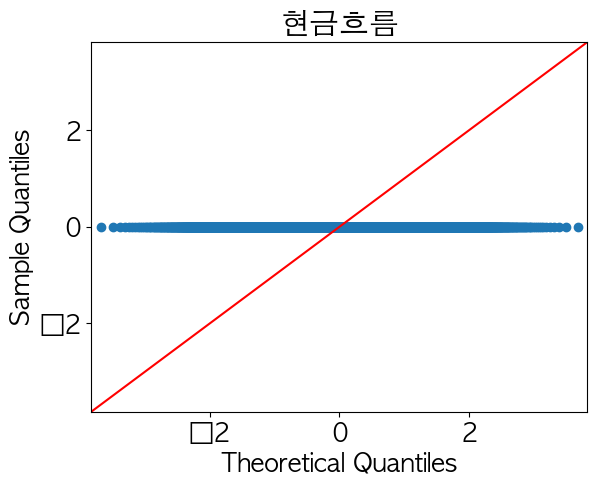

In [175]:
sm.qqplot(odds_df["현금흐름"], line="45", fit=True)
plt.title("현금흐름")
plt.show()

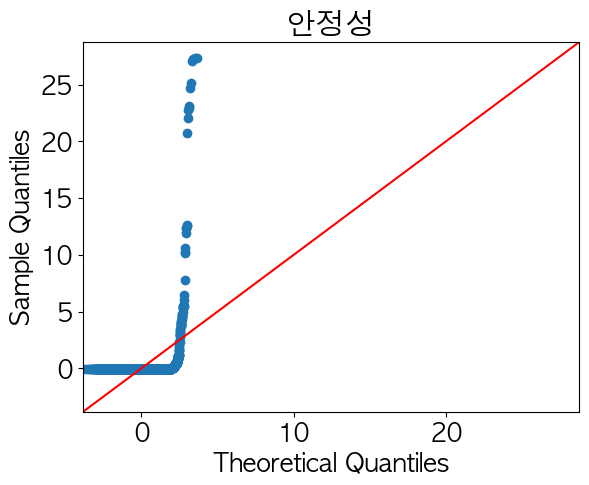

In [176]:
sm.qqplot(odds_df["안정성"], line="45", fit=True)
plt.title("안정성")
plt.show()

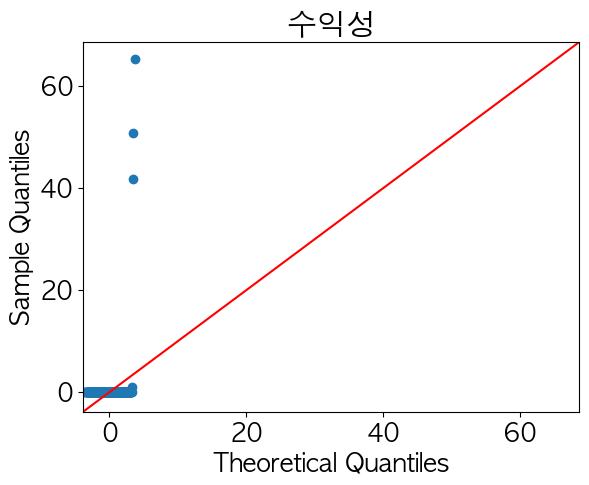

In [177]:
sm.qqplot(odds_df["수익성"], line="45", fit=True)
plt.title("수익성")
plt.show()

##### 분위수 값으로 점수 새로 산정
> your_dataframe['Quartile'] = pd.qcut(your_dataframe['YourColumn'], q=num_quantiles, labels=False)

In [178]:
odds_df["현금흐름 점수"] = pd.qcut(odds_df["현금흐름"], q=20, labels=False)
odds_df["안정성 점수"] = pd.qcut(odds_df["안정성"], q=20, labels=False)
odds_df["수익성 점수"] = pd.qcut(odds_df["수익성"], q=20, labels=False)

In [179]:
point_df = odds_df[["현금흐름 점수", "안정성 점수", "수익성 점수"]]

In [180]:
point_df = point_df * 0.5

In [181]:
point_df.columns = ["현금흐름", "안정성", "수익성"]

In [182]:
result_df = pd.concat([com, point_df, life_cycle, y_train], axis=1)

##### 기업수명주기별로 describe

In [183]:
intro = result_df[result_df["도입기"] == 1]
growth = result_df[result_df["성장기"] == 1]
mature = result_df[result_df["성숙기"] == 1]
decline = result_df[result_df["쇠퇴기"] == 1]

##### 전체 describe

In [184]:
result_df.describe()

,거래소코드,회계년도,현금흐름,안정성,수익성,도입기,성장기,성숙기,쇠퇴기,부실판단
count,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000
mean,66505.56638,2019.34771,4.75000,4.75000,4.75000,0.30179,0.16368,0.21018,0.32434,0.50000
std,23867.23368,2.95466,2.88388,2.88388,2.88388,0.45906,0.37001,0.40746,0.46816,0.50003
min,10037.00000,2014.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,51251.00000,2017.00000,2.12500,2.12500,2.12500,0.00000,0.00000,0.00000,0.00000,0.00000
50%,69967.50000,2020.00000,4.75000,4.75000,4.75000,0.00000,0.00000,0.00000,0.00000,0.50000
75%,86065.75000,2022.00000,7.37500,7.37500,7.37500,1.00000,0.00000,0.00000,1.00000,1.00000
max,101458.00000,2022.00000,9.50000,9.50000,9.50000,1.00000,1.00000,1.00000,1.00000,1.00000


In [185]:
result_df[result_df['부실판단'] == 0].describe()

,거래소코드,회계년도,현금흐름,안정성,수익성,도입기,성장기,성숙기,쇠퇴기,부실판단
count,4301.00000,4301.00000,4301.00000,4301.00000,4301.00000,4301.00000,4301.00000,4301.00000,4301.00000,4301.00000
mean,71092.73913,2020.96559,5.57068,5.49686,5.96489,0.30179,0.16368,0.21018,0.32434,0.00000
std,22838.33828,2.04251,2.77457,2.71926,2.73263,0.45909,0.37003,0.40749,0.46818,0.00000
min,10189.00000,2014.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,58291.00000,2021.00000,3.50000,3.50000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,75843.00000,2022.00000,6.00000,6.00000,6.50000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,90042.00000,2022.00000,8.00000,8.00000,8.00000,1.00000,0.00000,0.00000,1.00000,0.00000
max,101361.00000,2022.00000,9.50000,9.50000,9.50000,1.00000,1.00000,1.00000,1.00000,0.00000


In [186]:
result_df[result_df["부실판단"] == 1].describe()

,거래소코드,회계년도,현금흐름,안정성,수익성,도입기,성장기,성숙기,쇠퇴기,부실판단
count,4301.00000,4301.00000,4301.00000,4301.00000,4301.00000,4301.00000,4301.00000,4301.00000,4301.00000,4301.00000
mean,61918.39363,2017.72983,3.92932,4.00314,3.53511,0.30179,0.16368,0.21018,0.32434,1.00000
std,23994.54880,2.83795,2.75497,2.85049,2.49312,0.45909,0.37003,0.40749,0.46818,0.00000
min,10037.00000,2014.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
25%,46667.00000,2015.00000,1.50000,1.50000,1.50000,0.00000,0.00000,0.00000,0.00000,1.00000
50%,65742.00000,2018.00000,3.50000,3.50000,3.50000,0.00000,0.00000,0.00000,0.00000,1.00000
75%,80783.00000,2020.00000,6.00000,6.50000,5.50000,1.00000,0.00000,0.00000,1.00000,1.00000
max,101458.00000,2022.00000,9.50000,9.50000,9.50000,1.00000,1.00000,1.00000,1.00000,1.00000


##### 도입기 describe

In [187]:
result_df.describe()

,거래소코드,회계년도,현금흐름,안정성,수익성,도입기,성장기,성숙기,쇠퇴기,부실판단
count,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000,8602.00000
mean,66505.56638,2019.34771,4.75000,4.75000,4.75000,0.30179,0.16368,0.21018,0.32434,0.50000
std,23867.23368,2.95466,2.88388,2.88388,2.88388,0.45906,0.37001,0.40746,0.46816,0.50003
min,10037.00000,2014.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,51251.00000,2017.00000,2.12500,2.12500,2.12500,0.00000,0.00000,0.00000,0.00000,0.00000
50%,69967.50000,2020.00000,4.75000,4.75000,4.75000,0.00000,0.00000,0.00000,0.00000,0.50000
75%,86065.75000,2022.00000,7.37500,7.37500,7.37500,1.00000,0.00000,0.00000,1.00000,1.00000
max,101458.00000,2022.00000,9.50000,9.50000,9.50000,1.00000,1.00000,1.00000,1.00000,1.00000


In [188]:
intro[intro["부실판단"] == 0].describe()

,거래소코드,회계년도,현금흐름,안정성,수익성,도입기,성장기,성숙기,쇠퇴기,부실판단
count,1298.00000,1298.00000,1298.00000,1298.00000,1298.00000,1298.00000,1298.00000,1298.00000,1298.00000,1298.00000
mean,72536.18875,2021.22342,4.43875,5.08359,5.57935,1.00000,0.00000,0.00000,0.00000,0.00000
std,22772.11497,1.84379,2.29786,2.61375,2.69546,0.00000,0.00000,0.00000,0.00000,0.00000
min,10341.00000,2014.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,59648.00000,2022.00000,2.50000,3.00000,3.50000,1.00000,0.00000,0.00000,0.00000,0.00000
50%,77409.00000,2022.00000,4.50000,5.00000,6.00000,1.00000,0.00000,0.00000,0.00000,0.00000
75%,91401.25000,2022.00000,6.00000,7.00000,7.87500,1.00000,0.00000,0.00000,0.00000,0.00000
max,101361.00000,2022.00000,9.50000,9.50000,9.50000,1.00000,0.00000,0.00000,0.00000,0.00000


In [189]:
intro[intro["부실판단"] == 1].describe()

,거래소코드,회계년도,현금흐름,안정성,수익성,도입기,성장기,성숙기,쇠퇴기,부실판단
count,1298.00000,1298.00000,1298.00000,1298.00000,1298.00000,1298.00000,1298.00000,1298.00000,1298.00000,1298.00000
mean,65651.36595,2017.95917,2.45763,4.23074,3.65948,1.00000,0.00000,0.00000,0.00000,1.00000
std,23962.04184,2.80802,1.82317,2.80353,2.86028,0.00000,0.00000,0.00000,0.00000,0.00000
min,10062.00000,2014.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000
25%,50357.75000,2015.00000,1.00000,2.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000
50%,69862.50000,2018.00000,2.50000,4.00000,3.00000,1.00000,0.00000,0.00000,0.00000,1.00000
75%,84984.00000,2020.00000,3.50000,6.50000,6.00000,1.00000,0.00000,0.00000,0.00000,1.00000
max,101320.00000,2022.00000,8.50000,9.50000,9.50000,1.00000,0.00000,0.00000,0.00000,1.00000


##### 성장기 describe

In [190]:
growth.describe()

,거래소코드,회계년도,현금흐름,안정성,수익성,도입기,성장기,성숙기,쇠퇴기,부실판단
count,1408.00000,1408.00000,1408.00000,1408.00000,1408.00000,1408.00000,1408.00000,1408.00000,1408.00000,1408.00000
mean,67032.77628,2019.54048,6.60156,3.99112,5.16300,0.00000,1.00000,0.00000,0.00000,0.50000
std,24414.86342,3.00150,1.90415,2.64651,2.75702,0.00000,0.00000,0.00000,0.00000,0.50018
min,10259.00000,2014.00000,0.50000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
25%,51567.00000,2017.00000,5.50000,1.50000,3.00000,0.00000,1.00000,0.00000,0.00000,0.00000
50%,70491.00000,2021.00000,7.00000,4.00000,5.00000,0.00000,1.00000,0.00000,0.00000,0.50000
75%,87484.50000,2022.00000,8.00000,6.00000,7.50000,0.00000,1.00000,0.00000,0.00000,1.00000
max,101294.00000,2022.00000,9.50000,9.50000,9.50000,0.00000,1.00000,0.00000,0.00000,1.00000


In [191]:
growth[growth["부실판단"] == 0].describe()

,거래소코드,회계년도,현금흐름,안정성,수익성,도입기,성장기,성숙기,쇠퇴기,부실판단
count,704.00000,704.00000,704.00000,704.00000,704.00000,704.00000,704.00000,704.00000,704.00000,704.00000
mean,73321.28977,2021.44318,7.13636,4.92685,7.06108,0.00000,1.00000,0.00000,0.00000,0.00000
std,22353.07577,1.59200,1.60897,2.54112,2.10360,0.00000,0.00000,0.00000,0.00000,0.00000
min,10669.00000,2014.00000,1.50000,0.00000,0.50000,0.00000,1.00000,0.00000,0.00000,0.00000
25%,60939.50000,2022.00000,6.50000,3.00000,6.00000,0.00000,1.00000,0.00000,0.00000,0.00000
50%,77674.00000,2022.00000,7.50000,5.00000,7.50000,0.00000,1.00000,0.00000,0.00000,0.00000
75%,92216.50000,2022.00000,8.50000,7.00000,8.50000,0.00000,1.00000,0.00000,0.00000,0.00000
max,101294.00000,2022.00000,9.50000,9.50000,9.50000,0.00000,1.00000,0.00000,0.00000,0.00000


In [192]:
growth[growth["부실판단"] == 1].describe()

,거래소코드,회계년도,현금흐름,안정성,수익성,도입기,성장기,성숙기,쇠퇴기,부실판단
count,704.00000,704.00000,704.00000,704.00000,704.00000,704.00000,704.00000,704.00000,704.00000,704.00000
mean,60744.26278,2017.63778,6.06676,3.05540,3.26491,0.00000,1.00000,0.00000,0.00000,1.00000
std,24782.16543,2.87151,2.02364,2.40978,1.89006,0.00000,0.00000,0.00000,0.00000,0.00000
min,10259.00000,2014.00000,0.50000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
25%,44560.50000,2015.00000,5.00000,1.00000,2.00000,0.00000,1.00000,0.00000,0.00000,1.00000
50%,63892.00000,2018.00000,6.00000,2.50000,3.00000,0.00000,1.00000,0.00000,0.00000,1.00000
75%,80942.00000,2020.00000,7.50000,4.50000,4.50000,0.00000,1.00000,0.00000,0.00000,1.00000
max,101244.00000,2022.00000,9.50000,9.00000,8.00000,0.00000,1.00000,0.00000,0.00000,1.00000


##### 성숙기 describe

In [193]:
mature.describe()

,거래소코드,회계년도,현금흐름,안정성,수익성,도입기,성장기,성숙기,쇠퇴기,부실판단
count,1808.00000,1808.00000,1808.00000,1808.00000,1808.00000,1808.00000,1808.00000,1808.00000,1808.00000,1808.00000
mean,64168.30918,2019.21792,7.34403,4.61256,5.61477,0.00000,0.00000,1.00000,0.00000,0.50000
std,24121.54897,3.04968,1.89464,2.98102,2.71313,0.00000,0.00000,0.00000,0.00000,0.50014
min,10128.00000,2014.00000,0.50000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
25%,49059.50000,2017.00000,6.50000,2.00000,3.50000,0.00000,0.00000,1.00000,0.00000,0.00000
50%,66912.00000,2020.00000,7.50000,4.50000,5.50000,0.00000,0.00000,1.00000,0.00000,0.50000
75%,82876.00000,2022.00000,9.00000,7.50000,8.00000,0.00000,0.00000,1.00000,0.00000,1.00000
max,101360.00000,2022.00000,9.50000,9.50000,9.50000,0.00000,0.00000,1.00000,0.00000,1.00000


In [194]:
mature[mature["부실판단"] == 0].describe()

,거래소코드,회계년도,현금흐름,안정성,수익성,도입기,성장기,성숙기,쇠퇴기,부실판단
count,904.00000,904.00000,904.00000,904.00000,904.00000,904.00000,904.00000,904.00000,904.00000,904.00000
mean,68586.08407,2021.03319,8.02434,5.84513,7.50940,0.00000,0.00000,1.00000,0.00000,0.00000
std,24074.52500,1.97409,1.53023,2.76243,1.98588,0.00000,0.00000,0.00000,0.00000,0.00000
min,10455.00000,2014.00000,2.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
25%,52950.50000,2022.00000,7.50000,3.50000,6.50000,0.00000,0.00000,1.00000,0.00000,0.00000
50%,72807.00000,2022.00000,8.50000,6.50000,8.00000,0.00000,0.00000,1.00000,0.00000,0.00000
75%,88256.75000,2022.00000,9.00000,8.50000,9.00000,0.00000,0.00000,1.00000,0.00000,0.00000
max,101360.00000,2022.00000,9.50000,9.50000,9.50000,0.00000,0.00000,1.00000,0.00000,0.00000


In [195]:
mature[mature["부실판단"] == 1].describe()

,거래소코드,회계년도,현금흐름,안정성,수익성,도입기,성장기,성숙기,쇠퇴기,부실판단
count,904.00000,904.00000,904.00000,904.00000,904.00000,904.00000,904.00000,904.00000,904.00000,904.00000
mean,59750.53429,2017.40265,6.66372,3.37998,3.72013,0.00000,0.00000,1.00000,0.00000,1.00000
std,23359.86194,2.84899,1.97864,2.66644,1.89719,0.00000,0.00000,0.00000,0.00000,0.00000
min,10128.00000,2014.00000,0.50000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000
25%,45830.25000,2014.00000,5.87500,1.00000,2.50000,0.00000,0.00000,1.00000,0.00000,1.00000
50%,62381.50000,2017.00000,7.00000,3.00000,4.00000,0.00000,0.00000,1.00000,0.00000,1.00000
75%,76856.75000,2020.00000,8.00000,5.00000,5.00000,0.00000,0.00000,1.00000,0.00000,1.00000
max,101147.00000,2022.00000,9.50000,9.50000,9.00000,0.00000,0.00000,1.00000,0.00000,1.00000


##### 쇠퇴기 describe

In [196]:
decline.describe()

,거래소코드,회계년도,현금흐름,안정성,수익성,도입기,성장기,성숙기,쇠퇴기,부실판단
count,2790.00000,2790.00000,2790.00000,2790.00000,2790.00000,2790.00000,2790.00000,2790.00000,2790.00000,2790.00000
mean,65345.87240,2019.10789,3.34588,5.30842,4.10269,0.00000,0.00000,0.00000,1.00000,0.50000
std,23421.50407,2.91240,2.63364,2.95514,2.82794,0.00000,0.00000,0.00000,0.00000,0.50009
min,10037.00000,2014.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
25%,49930.25000,2017.00000,1.00000,3.00000,1.50000,0.00000,0.00000,0.00000,1.00000,0.00000
50%,68011.50000,2020.00000,3.00000,5.50000,4.00000,0.00000,0.00000,0.00000,1.00000,0.50000
75%,83440.75000,2022.00000,5.00000,8.00000,6.50000,0.00000,0.00000,0.00000,1.00000,1.00000
max,101458.00000,2022.00000,9.50000,9.50000,9.50000,0.00000,0.00000,0.00000,1.00000,1.00000


In [197]:
decline[decline["부실판단"] == 0].describe()

,거래소코드,회계년도,현금흐름,안정성,수익성,도입기,성장기,성숙기,쇠퇴기,부실판단
count,1395.00000,1395.00000,1395.00000,1395.00000,1395.00000,1395.00000,1395.00000,1395.00000,1395.00000,1395.00000
mean,70249.38351,2020.44086,4.24373,5.94337,4.76953,0.00000,0.00000,0.00000,1.00000,0.00000
std,22130.98606,2.33400,2.81319,2.76618,2.78667,0.00000,0.00000,0.00000,0.00000,0.00000
min,10189.00000,2014.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
25%,58198.50000,2019.00000,2.00000,4.00000,2.50000,0.00000,0.00000,0.00000,1.00000,0.00000
50%,73404.00000,2022.00000,4.00000,6.50000,5.00000,0.00000,0.00000,0.00000,1.00000,0.00000
75%,87614.00000,2022.00000,6.50000,8.50000,7.00000,0.00000,0.00000,0.00000,1.00000,0.00000
max,101356.00000,2022.00000,9.50000,9.50000,9.50000,0.00000,0.00000,0.00000,1.00000,0.00000


In [198]:
decline[decline["부실판단"] == 1].describe()

,거래소코드,회계년도,현금흐름,안정성,수익성,도입기,성장기,성숙기,쇠퇴기,부실판단
count,1395.00000,1395.00000,1395.00000,1395.00000,1395.00000,1395.00000,1395.00000,1395.00000,1395.00000,1395.00000
mean,60442.36129,2017.77491,2.44803,4.67348,3.43584,0.00000,0.00000,0.00000,1.00000,1.00000
std,23656.35945,2.82250,2.08559,3.00221,2.71011,0.00000,0.00000,0.00000,0.00000,0.00000
min,10037.00000,2014.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000
25%,45480.00000,2015.00000,0.50000,2.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000
50%,63918.00000,2018.00000,2.00000,4.50000,3.00000,0.00000,0.00000,0.00000,1.00000,1.00000
75%,77730.00000,2020.00000,4.00000,7.50000,5.50000,0.00000,0.00000,0.00000,1.00000,1.00000
max,101458.00000,2022.00000,9.00000,9.50000,9.50000,0.00000,0.00000,0.00000,1.00000,1.00000


##### 시각화

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


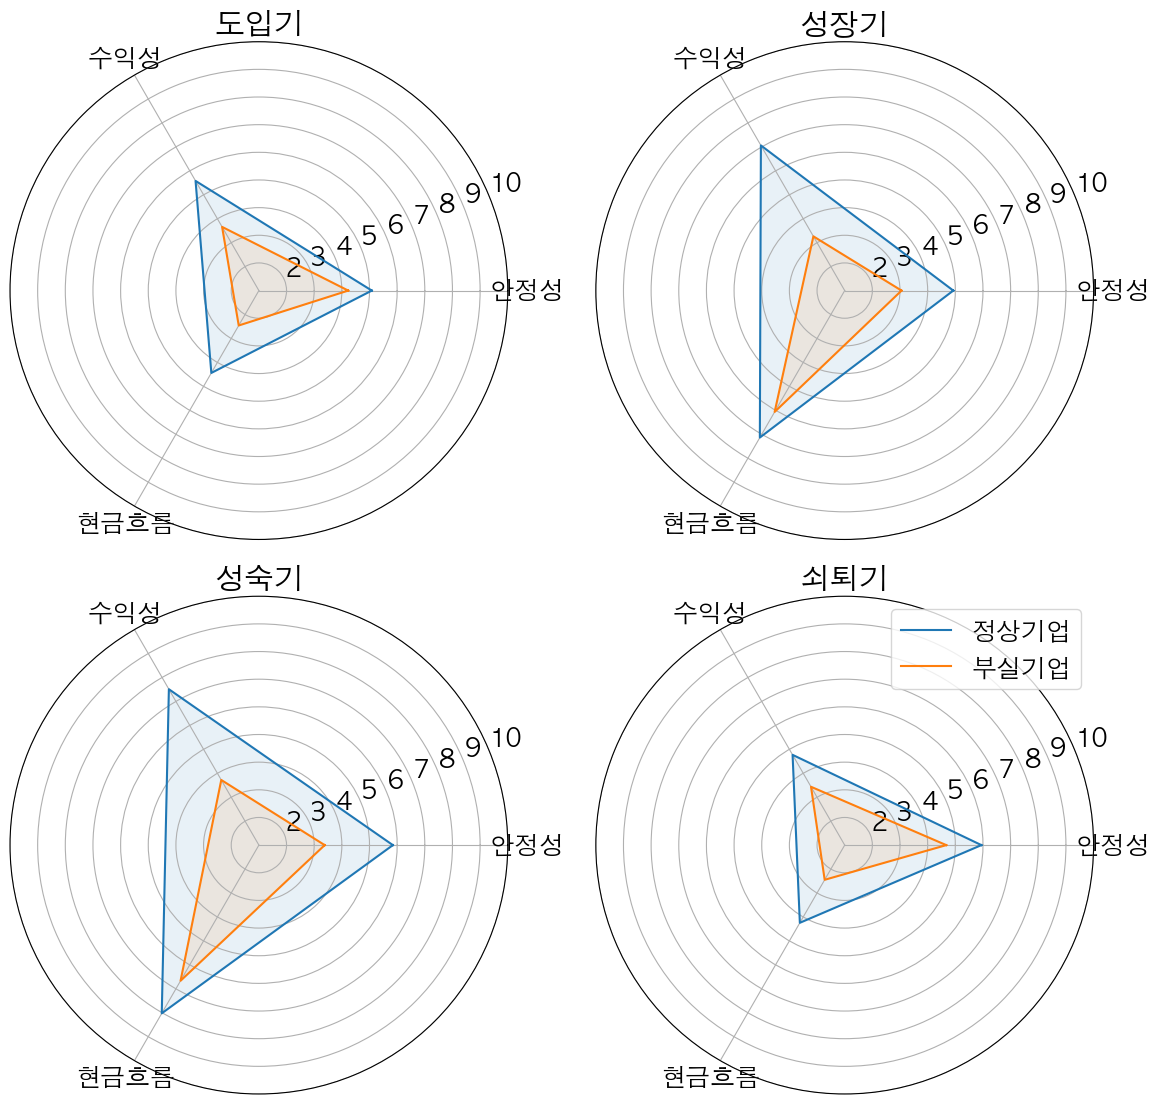

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

categories = ["안정성", "수익성", "현금흐름"]
plt.rc("font", size=18)  # 기본 폰트 크기
plt.rc("figure", titlesize=48)

normal = [
    [
        intro[intro["부실판단"] == 0].describe()["안정성"]["mean"],
        intro[intro["부실판단"] == 0].describe()["수익성"]["mean"],
        intro[intro["부실판단"] == 0].describe()["현금흐름"]["mean"],
    ],
    [
        growth[growth["부실판단"] == 0].describe()["안정성"]["mean"],
        growth[growth["부실판단"] == 0].describe()["수익성"]["mean"],
        growth[growth["부실판단"] == 0].describe()["현금흐름"]["mean"],
    ],
    [
        mature[mature["부실판단"] == 0].describe()["안정성"]["mean"],
        mature[mature["부실판단"] == 0].describe()["수익성"]["mean"],
        mature[mature["부실판단"] == 0].describe()["현금흐름"]["mean"],
    ],
    [
        decline[decline["부실판단"] == 0].describe()["안정성"]["mean"],
        decline[decline["부실판단"] == 0].describe()["수익성"]["mean"],
        decline[decline["부실판단"] == 0].describe()["현금흐름"]["mean"],
    ],
]

bankruptcy = [
    [
        intro[intro["부실판단"] == 1].describe()["안정성"]["mean"],
        intro[intro["부실판단"] == 1].describe()["수익성"]["mean"],
        intro[intro["부실판단"] == 1].describe()["현금흐름"]["mean"],
    ],
    [
        growth[growth["부실판단"] == 1].describe()["안정성"]["mean"],
        growth[growth["부실판단"] == 1].describe()["수익성"]["mean"],
        growth[growth["부실판단"] == 1].describe()["현금흐름"]["mean"],
    ],
    [
        mature[mature["부실판단"] == 1].describe()["안정성"]["mean"],
        mature[mature["부실판단"] == 1].describe()["수익성"]["mean"],
        mature[mature["부실판단"] == 1].describe()["현금흐름"]["mean"],
    ],
    [
        decline[decline["부실판단"] == 1].describe()["안정성"]["mean"],
        decline[decline["부실판단"] == 1].describe()["수익성"]["mean"],
        decline[decline["부실판단"] == 1].describe()["현금흐름"]["mean"],
    ],
]
life_cycle = ["도입기", "성장기", "성숙기", "쇠퇴기"]

N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, axs = plt.subplots(2, 2, figsize=(12, 12), subplot_kw=dict(polar=True))
axs = axs.flatten()

for ax, normal, bankruptcy, life_cycle in zip(axs, normal, bankruptcy, life_cycle):
    normal += normal[:1]
    bankruptcy += bankruptcy[:1]
    ax.set_ylim(1, 10)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.plot(angles, normal, label="정상기업")
    ax.fill(angles, normal, alpha=0.1)
    ax.plot(angles, bankruptcy, label="부실기업")
    ax.fill(angles, bankruptcy, alpha=0.1)
    plt.legend(loc="upper right")
    ax.set_title(life_cycle)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

##### 예시 기업 시각화

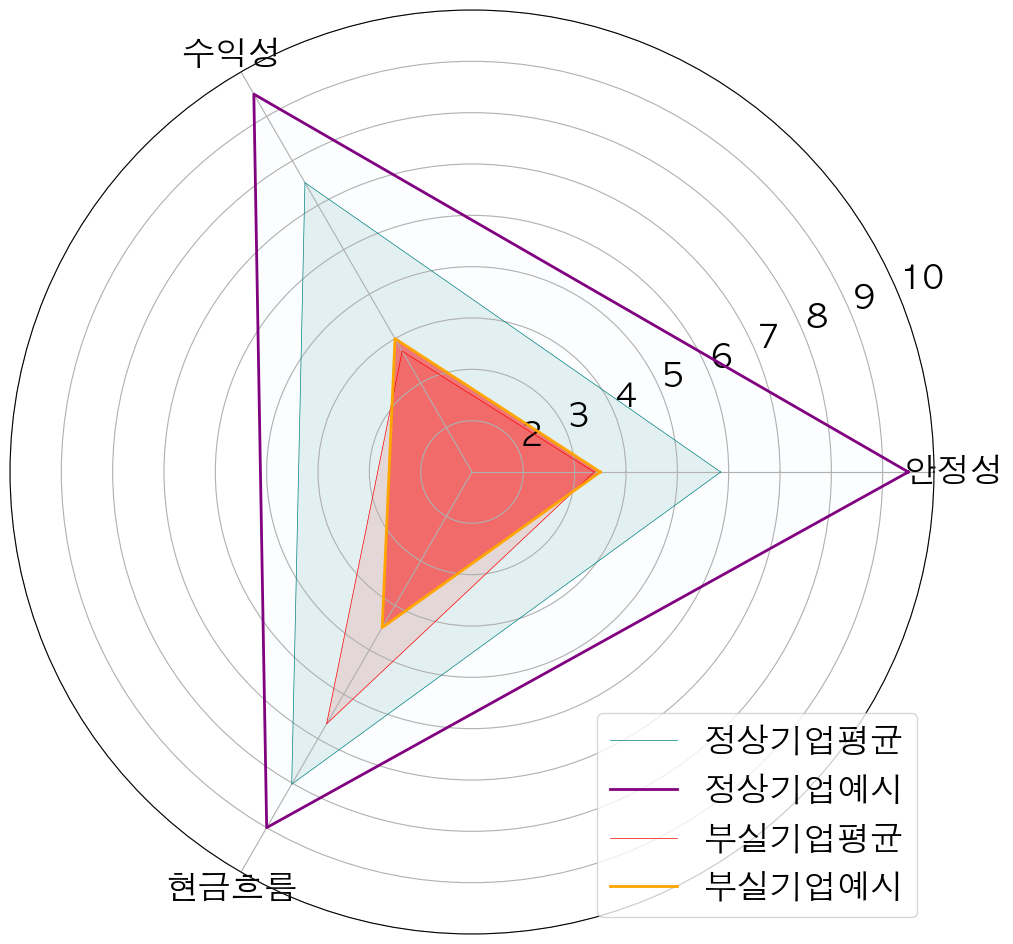

In [202]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# 데이터 설정
categories = [
    "안정성",
    "수익성",
    "현금흐름",
]  # Adjust the categories based on your data
plt.rc("font", size=24)  # 기본 폰트 크기
plt.rc("figure", titlesize=48)

figsize = (12, 12)
# Assuming 'mature' is a DataFrame with relevant data
normal_mean = [
    mature[mature["부실판단"] == 0].describe()["안정성"]["mean"],
    mature[mature["부실판단"] == 0].describe()["수익성"]["mean"],
    mature[mature["부실판단"] == 0].describe()["현금흐름"]["mean"],
]

bankruptcy_mean = [
    mature[mature["부실판단"] == 1].describe()["안정성"]["mean"],
    mature[mature["부실판단"] == 1].describe()["수익성"]["mean"],
    mature[mature["부실판단"] == 1].describe()["현금흐름"]["mean"],
]

normal_ex = (
    mature[mature["회사명"] == "주식회사에이피텍"][["안정성", "수익성", "현금흐름"]]
    .values.flatten()
    .tolist()
)
bankruptcy_ex = (
    mature[mature["회사명"] == "(주)명신정유"][["안정성", "수익성", "현금흐름"]].values.flatten().tolist()
)

# 각 카테고리의 각도 계산
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
normal_mean += normal_mean[:1]
normal_ex += normal_ex[:1]
bankruptcy_mean += bankruptcy_mean[:1]
bankruptcy_ex += bankruptcy_ex[:1]
angles += angles[:1]

# 레이더 차트 생성 및 설정
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

# 축의 범위 설정
ax.set_ylim(1, 10)  # y축 범위를 1에서 10으로 설정

# 첫 번째 데이터 세트 추가
plt.xticks(angles[:-1], categories)
ax.plot(angles, normal_mean, label="정상기업평균", color="teal", linewidth=0.5)
ax.fill(angles, normal_mean, "teal", alpha=0.1)

# 두 번째 데이터 세트 추가
ax.plot(angles, normal_ex, label="정상기업예시", color="purple", linewidth=2)
ax.fill(angles, normal_ex, alpha=0.01)

# 세 번째 데이터 세트 추가
ax.plot(angles, bankruptcy_mean, label="부실기업평균", color="red", linewidth=0.5)
ax.fill(angles, bankruptcy_mean, "red", alpha=0.1)

# 네 번째 데이터 세트 추가
ax.plot(angles, bankruptcy_ex, label="부실기업예시", color="orange", linewidth=2)
ax.fill(angles, bankruptcy_ex, "red", alpha=0.5)

# 범례 추가
plt.legend(loc="lower right")

# 차트 표시
plt.show()